In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/* 1. Data Cleaning
• Read the dataset into a Pandas DataFrame.
• Handle any missing or inconsistent data. */

In [14]:
df = pd.read_csv('/content/Copy of Instagram_Analytics - DO NOT DELETE (for interview purposes) - Instagram Profile Overview.csv')
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 379 non-null    object 
 1   Profile impressions  379 non-null    int64  
 2   Shares               379 non-null    int64  
 3   Engagement           379 non-null    int64  
 4   Profile visits       379 non-null    int64  
 5   Profile reach        379 non-null    int64  
 6   Reel shares          379 non-null    int64  
 7   New followers        39 non-null     float64
 8   RowHash              373 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 26.8+ KB


,Date,Profile impressions,Shares,Engagement,Profile visits,Profile reach,Reel shares,New followers,RowHash
0,02/03/2025,83,0,0,0,71,0,0.0,55f2240d75506aea662053ed9adc6bd9cf1c6260073aac...
1,01/03/2025,109,0,0,0,82,0,0.0,09bb917c7fbc3422e044813ba2982c54e551815df00322...
2,28/02/2025,108,0,0,0,59,0,0.0,225a205709a1df025548f1d46a88e97d473b8c10c62588...
3,27/02/2025,82,0,0,0,45,0,19.0,fdc3b58749c9d80ef81a8d980e49b5dae70dbb324031b1...
4,26/02/2025,88,0,0,0,49,0,3.0,97be7df9e0bca9117fc86568d3b6a8cbe46c8824596b7c...
5,25/02/2025,129,0,0,0,63,0,2.0,d662ca34ccf14426c5f6b3b86d4ec87b9abc433f0ac07a...
6,24/02/2025,239,0,0,0,160,0,2.0,7247af4080e43b8f955be888c4c9abbe0ca3f7480e804d...
7,23/02/2025,218,0,0,0,125,0,6.0,5b5f57176b13d2ba5712acb307f3c5ce6997567b171da6...
8,22/02/2025,112,0,0,0,61,0,5.0,18ef527e3f79bbace108f155efebe5a3adeaf993be1dac...
9,21/02/2025,235,0,0,0,213,0,9.0,46b24267e1eb8a3e8555491e82c962f8a75fb093918884...


In [17]:
df["New followers"].fillna(0, inplace=True)

df["RowHash"].fillna("MISSING", inplace=True)

df.info(), df.tail(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 379 non-null    object 
 1   Profile impressions  379 non-null    int64  
 2   Shares               379 non-null    int64  
 3   Engagement           379 non-null    int64  
 4   Profile visits       379 non-null    int64  
 5   Profile reach        379 non-null    int64  
 6   Reel shares          379 non-null    int64  
 7   New followers        379 non-null    float64
 8   RowHash              379 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 26.8+ KB


<ipython-input-17-7b11a87c18dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["New followers"].fillna(0, inplace=True)


(None,
            Date  Profile impressions  Shares  Engagement  Profile visits  \
 369  27/02/2024                 6652       6         283              15   
 370  26/02/2024                 8876       5         398              16   
 371  25/02/2024                 8741       1         231               0   
 372  24/02/2024                 7202      31         432              18   
 373  23/02/2024                 6988       1         192               6   
 374  22/02/2024                 6961       0         114               3   
 375  21/02/2024                 7122       3         149               2   
 376  20/02/2024                 8570       1         268              17   
 377  19/02/2024                 7939       0         186               1   
 378  18/02/2024                10036       7         582               8   
 
      Profile reach  Reel shares  New followers  \
 369           3206            2            0.0   
 370           4551            5          

/* 2. Basic Analysis
• Calculate the average engagement rate for Instagram posts.
• Identify the top-performing post based on engagement (likes, comments, shares). */

In [22]:
# Calculate engagement rate for each row
df["Engagement Rate (%)"] = (df["Engagement"] / df["Profile impressions"]) * 100

average_engagement_rate = df["Engagement Rate (%)"].mean()
print("Average Engagement Rate is: \n",average_engagement_rate)

# Find the row with the highest engagement
top_post = df.loc[df["Engagement"].idxmax()]
print("\nHighest Engagement: ",top_post)



Average Engagement Rate is: 
 5.700031776333587

Highest Engagement:  Date                                                          14/04/2024
Profile impressions                                                 2535
Shares                                                                 0
Engagement                                                         15075
Profile visits                                                         0
Profile reach                                                       1842
Reel shares                                                            0
New followers                                                        0.0
RowHash                02c246bee6d2e643dd1d03096967891db78d643a930944...
Engagement Rate (%)                                           594.674556
Name: 322, dtype: object


/* 3. Visualization
• Create a simple line chart showing post engagement trends over time.
• Plot a bar chart comparing different post types (Reels vs. Static Posts).*/

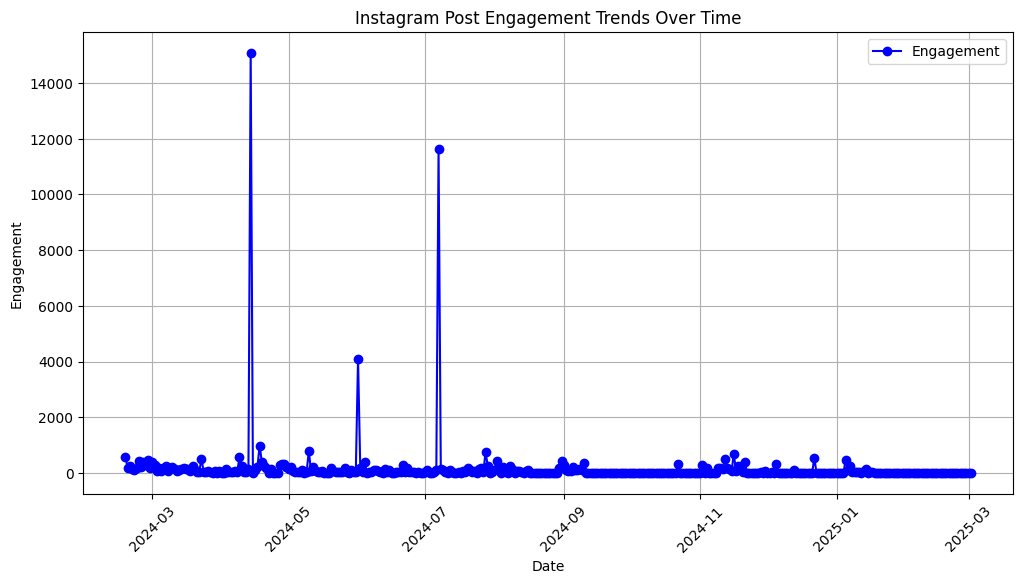

In [23]:
# ine chart showing post engagement trends over time
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
df.sort_values("Date", inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Engagement"], marker="o", linestyle="-", color="b", label="Engagement")
plt.xlabel("Date")
plt.ylabel("Engagement")
plt.title("Instagram Post Engagement Trends Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

'''There is no different post type data in the dataset.
i need reels or stories or photos or videos posting type data for a bar chart '''


In [25]:
def predict_post_performance(engagement, threshold=20000):
# Calculate the average engagement if no threshold is provided
 if threshold is None:
    threshold = df["Engagement"].mean()
    # Predict performance
 return "High-performing" if engagement >= threshold else "Low-performing"

# Example usage with a sample engagement value
sample_engagement = 10000
prediction = predict_post_performance(sample_engagement)
print("Prediction is: ",prediction)


Prediction is:  Low-performing
